# FAIR bioinfo

Thomas Denecker [](https://orcid.org/0000-0003-1421-7641) (IFB)

The BiGEst platform is organising a regional session of the IFB training course FAIR principles in a bioinformatics project from 9 to 11 April 2024 at the URFIST in Strasbourg, in the Studium, room E.02 in the Entresol.This 3-day course is aimed at bioinformaticians and biostatisticians wishing to acquire theoretical and practical skills on the FAIR principles (Easy to Find, Accessible, Interoperable, Reusable) applied to an analysis and/or development project.

## Introduction

*Ostreococcus tauri* is a unicellular green alga that serves as a valuable model organism for studying various aspects of eukaryotic cell biology, photosynthesis, and evolution. With its small genome size, rapid growth rate, and well-characterized physiological and genomic features, *O. tauri* offers a unique platform for investigating molecular mechanisms underlying biological processes.

Differential gene expression analysis in *O. tauri* provides insights into how this microalga responds to environmental cues, developmental changes, and stress conditions. By comparing gene expression levels between different experimental conditions or time points, researchers can identify genes that are significantly upregulated or downregulated, offering clues about their potential roles in cellular processes.

In this study, we performed differential expression analysis using high-throughput RNA sequencing (RNA-seq) data obtained from *O. tauri* under different growth conditions or treatments. By employing advanced bioinformatics tools such as DESeq2, we aimed to uncover key genes and pathways involved in the response of *O. tauri* to specific stimuli or perturbations.

This analysis provides valuable insights into the transcriptional landscape of *O. tauri* and sheds light on the molecular mechanisms governing its physiological responses, thus contributing to our understanding of cellular adaptation and acclimation in this important model organism.

## Data and methods

### Data

The RNA-seq data utilized in this study were obtained through a conventional analysis pipeline widely employed in transcriptomics research. Initially, the quality of raw sequencing data was assessed using FastQC to ensure high-quality reads. Subsequently, reads were aligned to the reference genome utilizing HISAT2, facilitating accurate mapping of transcripts. The resultant alignment files (SAM/BAM) were then processed and manipulated using Samtools, allowing for various downstream analyses. Finally, gene-level expression quantification was performed using Htseq count, enabling the enumeration of reads associated with each gene feature. This comprehensive pipeline ensured robust preprocessing and quantification of RNA-seq data, providing a reliable foundation for subsequent differential expression analysis using tools like DESeq2.

### Deseq2

DESeq2 is a powerful tool commonly used in RNA-seq data analysis to perform differential gene expression analysis. It employs sophisticated statistical methods to identify genes that are differentially expressed between different experimental conditions or sample groups. DESeq2 takes raw count data from RNA-seq experiments and applies normalization techniques to account for differences in sequencing depth and other sources of variation. It then fits a negative binomial model to the data, allowing for accurate estimation of variance and statistical testing for differential expression. By comparing expression levels across conditions, DESeq2 enables researchers to pinpoint genes that are significantly upregulated or downregulated, providing valuable insights into the underlying biological processes at play. Additionally, DESeq2 offers functionalities for data visualization and exploration, facilitating the interpretation of results and the generation of hypotheses for further investigation.

## Results

Differentially expressed genes are genes whose expression levels vary significantly between different sample groups or experimental conditions. In other words, these genes exhibit statistically significant differences in their transcriptional activity across compared conditions. In the context of RNA sequencing (RNA-seq) data analysis, identifying differentially expressed genes highlights variations in gene activity that may be associated with specific biological processes, responses to external stimuli, pathological states, developmental stages, or other experimental conditions. This information is valuable for understanding the underlying mechanisms of these phenomena and for identifying potential targets for further functional studies.

### Get data

In [ ]:
data = read.table(file = "../Notebook/deseq2_demo.tsv",  header = TRUE, row.names = 1, sep="\t")
data$Gene = rownames(data)
head(data)

                baseMean log2FoldChange     lfcSE       stat     pvalue padj
ostta01g00010  7.0884325    -1.46280989 0.8133842 -1.7984242 0.07210981   NA
ostta01g00020  6.0759498    -0.20211942 0.8068244 -0.2505123 0.80219121   NA
ostta01g00030  0.9362634     0.94632044 1.9601574  0.4827778 0.62925352   NA
ostta01g00040 16.4988814    -0.06769981 0.5728581 -0.1181790 0.90592580   NA
ostta01g00050 10.7192859     0.15972356 0.6702392  0.2383083 0.81164198   NA
ostta01g00060  3.8748866     0.38401923 0.9858109  0.3895465 0.69687189   NA
                       Gene
ostta01g00010 ostta01g00010
ostta01g00020 ostta01g00020
ostta01g00030 ostta01g00030
ostta01g00040 ostta01g00040
ostta01g00050 ostta01g00050
ostta01g00060 ostta01g00060

### Down regulated

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

### Up regulated

In [ ]:
data %>% filter(log2FoldChange > 2, padj < 0.05)

                 baseMean log2FoldChange     lfcSE     stat       pvalue
ostta02g00080    29.56508       5.443416 0.8587833 6.338522 2.319804e-10
ostta13g02170    21.56799       2.190194 0.6348743 3.449807 5.609869e-04
ostta18g00090  2404.14743       2.445414 0.4841484 5.050960 4.395963e-07
ostta18g00680    86.19992       2.217704 0.5309856 4.176579 2.959258e-05
ostta18g01200   238.86661       2.132801 0.4629375 4.607103 4.083172e-06
ostta18g01690    85.24020       2.447758 0.6299163 3.885847 1.019739e-04
ostta18g01970   168.39206       3.115217 0.4499598 6.923323 4.411716e-12
ostta18g01980 13705.92368       3.557967 0.4234272 8.402782 4.360229e-17
                      padj          Gene
ostta02g00080 7.353779e-08 ostta02g00080
ostta13g02170 3.335735e-02 ostta13g02170
ostta18g00090 1.045140e-04 ostta18g00090
ostta18g00680 3.517818e-03 ostta18g00680
ostta18g01200 7.766194e-04 ostta18g01200
ostta18g01690 1.077524e-02 ostta18g01690
ostta18g01970 2.097771e-09 ostta18g01970
ostta18g01980 4

### Volcano plot

(`geom_point()`).

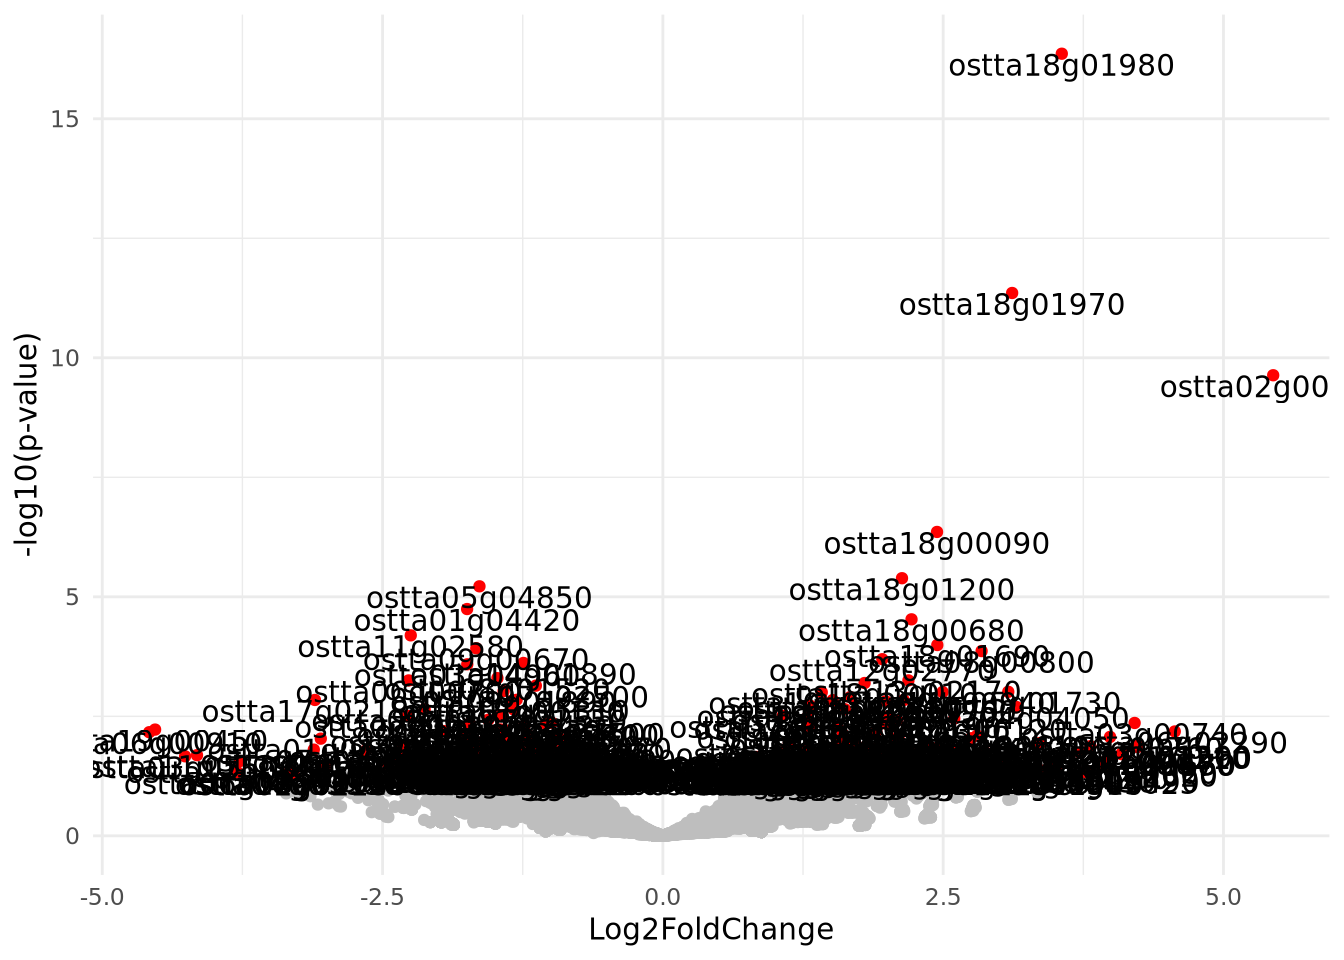

In [ ]:
library(ggplot2)

pvalue_threshold <- 0.05

p <- ggplot(data, aes(x = log2FoldChange, y = -log10(pvalue))) +
  geom_point(color = ifelse(data$pvalue < pvalue_threshold, "red", "gray")) +
  scale_color_manual(values = c("gray", "red")) +
  geom_text(data = subset(data, pvalue < pvalue_threshold), aes(label = Gene), vjust = 1) +
  labs(x = "Log2FoldChange", y = "-log10(p-value)") +
  theme_minimal()

p

## Conclusion

## Session

In [ ]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /shared/ifbstor1/software/miniconda/envs/r-4.3.1/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.0 DT_0.33       dplyr_1.1.4  

loaded via a namespace (and not attached):
 [1] vctrs_0.6.5       cli_3.6.2         knitr_1.45        rlang_1.1.3      
 [5] xfun_0.43         generics_0.1.3    jsonlite_1.8.8    labeling_0.4.3   
 [9] glue_1.7.0        colorspace_2.1-0  htmltools_0.5.8.1 sass_0.4